# Analyze

In [1]:
# Import necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [2]:
#memanggil data yang akan digunakan
olist_order_dataset = pd.read_csv('olist_order_dataset_clean.csv', index_col = False)
olist_order_customer_dataset = pd.read_csv('olist_customer_dataset_clean.csv',index_col = False )
olist_order_payments_dataset = pd.read_csv('olist_order_payment_clean.csv', index_col = False)
olist_order_reviews_dataset = pd.read_csv('olist_order_reviews_clean.csv', index_col = False)
olist_order_products_dataset = pd.read_csv('olist_order_products_dataset.csv', index_col = False)
olist_order_item_dataset = pd.read_csv('olist_order_item_dataset.csv', index_col = False)

In [3]:
olist_order_payments_dataset

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
95900,103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
95901,103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
95902,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
95903,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [4]:
# mengubah tipe data datetime
olist_order_reviews_dataset['review_answer_timestamp'] = pd.to_datetime(olist_order_reviews_dataset['review_answer_timestamp'])
olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    99224 non-null  int64         
 1   review_id                99224 non-null  object        
 2   order_id                 99224 non-null  object        
 3   review_score             99224 non-null  int64         
 4   review_creation_date     99224 non-null  object        
 5   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
# Mengekstrak informasi tanggal
olist_order_reviews_dataset['hour_review'] = olist_order_reviews_dataset.review_answer_timestamp.dt.hour
olist_order_reviews_dataset['day_review'] = olist_order_reviews_dataset.review_answer_timestamp.dt.day
olist_order_reviews_dataset['month_review'] = olist_order_reviews_dataset.review_answer_timestamp.dt.month
olist_order_reviews_dataset['year_review'] = olist_order_reviews_dataset.review_answer_timestamp.dt.year
olist_order_reviews_dataset['dayofweek_review'] = olist_order_reviews_dataset.review_answer_timestamp.dt.dayofweek
olist_order_reviews_dataset['weekofyear_review'] = olist_order_reviews_dataset.review_answer_timestamp.dt.isocalendar().week

olist_order_reviews_dataset.head()

,index,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,hour_review,day_review,month_review,year_review,dayofweek_review,weekofyear_review
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,21,18,1,2018,3,3
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,3,11,3,2018,6,10
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,14,18,2,2018,6,7
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06,22,21,4,2017,4,16
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53,10,2,3,2018,4,9


In [6]:
# merge pada data order dan payments
df = pd.merge(olist_order_dataset, olist_order_payments_dataset, on = 'order_id', how = 'left' )

In [7]:
df

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,hour_purchase,day_purchase,month_purchase,year_purchase,dayofweek_purchase,weekofyear_purchase,index_y,payment_sequential,payment_type,payment_installments,payment_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,10770.0,1.0,credit_card,1.0,18.12
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,44246.0,3.0,voucher,1.0,2.00
2,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,91130.0,2.0,voucher,1.0,18.59
3,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,20,24,7,2018,1,30,7652.0,1.0,boleto,1.0,141.46
4,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,8,8,8,2018,2,32,11176.0,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103739,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,9,9,3,2017,3,10,50534.0,1.0,credit_card,3.0,85.08
103740,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,12,6,2,2018,1,6,48750.0,1.0,credit_card,3.0,195.00
103741,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,14,27,8,2017,6,34,96280.0,1.0,credit_card,5.0,271.01
103742,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,21,8,1,2018,0,2,NaN,NaN,NaN,NaN,NaN


## Pembayaran per Jam

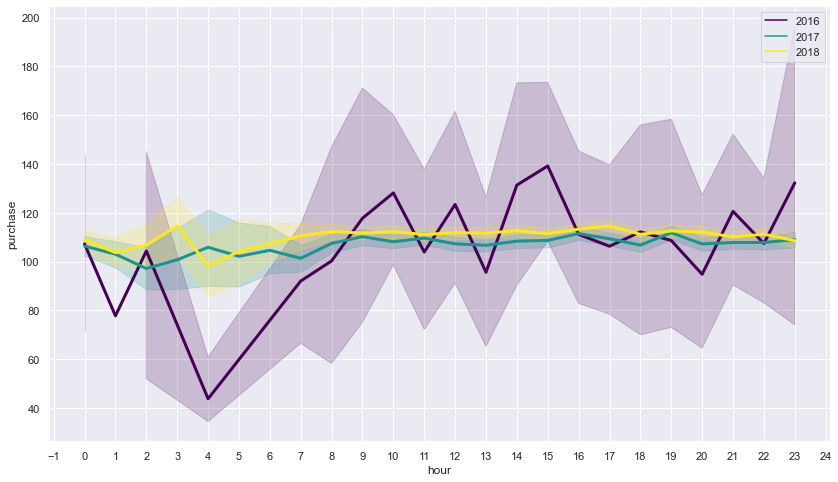

In [8]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df, x ='hour_purchase', y = 'payment_value',
                  hue='year_purchase', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('purchase')
plt.xlabel('hour')
plt.show()

## Pembayaran per Jam Berdasarkan Tipe Hari

In [9]:
#membagi hari menjadi weekdays dan weekend
df['day_status'] = df.dayofweek_purchase.map(lambda x: 'weekend' if (x==5) | (x==6) else 'weekdays' )
df.head()

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,hour_purchase,day_purchase,month_purchase,year_purchase,dayofweek_purchase,weekofyear_purchase,index_y,payment_sequential,payment_type,payment_installments,payment_value,day_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,10770.0,1.0,credit_card,1.0,18.12,weekdays
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,44246.0,3.0,voucher,1.0,2.00,weekdays
2,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,91130.0,2.0,voucher,1.0,18.59,weekdays
3,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,20,24,7,2018,1,30,7652.0,1.0,boleto,1.0,141.46,weekdays
4,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,8,8,8,2018,2,32,11176.0,1.0,credit_card,3.0,179.12,weekdays


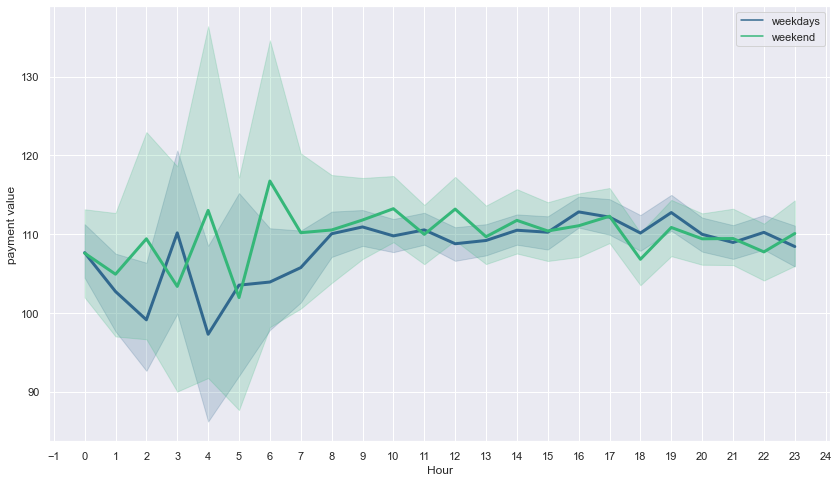

In [10]:
#membuat grafik
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df, x ='hour_purchase', y = 'payment_value',
                  hue='day_status', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('payment value')
plt.xlabel('Hour')
plt.show()

## Jumlah Customer per Kota

In [11]:
olist_order_customer_dataset.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
df2= olist_order_customer_dataset.groupby(['customer_city'])['customer_id'].count().reset_index(name = 'total_customer').sort_values(by = ['total_customer'], ascending = False)

In [13]:
df2.head()

,customer_city,total_customer
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521


<AxesSubplot:xlabel='total_customer', ylabel='customer_city'>

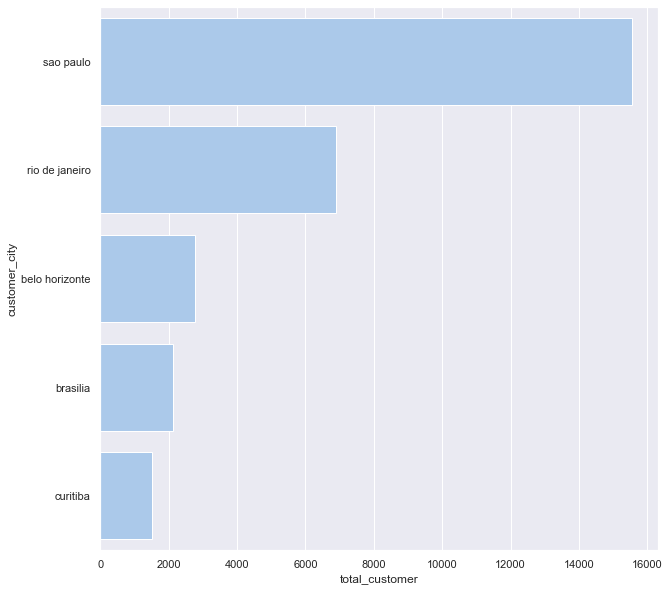

In [51]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total_customer", y="customer_city", data=df2.head(),
            label="Total", color="b")

## Jumlah Order per Tahun

In [47]:
df7 = df.groupby(['year_purchase'])['order_id'].count().reset_index(name = 'count').sort_values(by = ['count'], ascending = False)
df7

,year_purchase,count
2,2018,55936
1,2017,47461
0,2016,347


[Text(0.5, 0, 'Jumlah Order'),
 Text(0, 0.5, 'Tahun'),
 Text(0.5, 1.0, 'Penjualan per Tahun')]

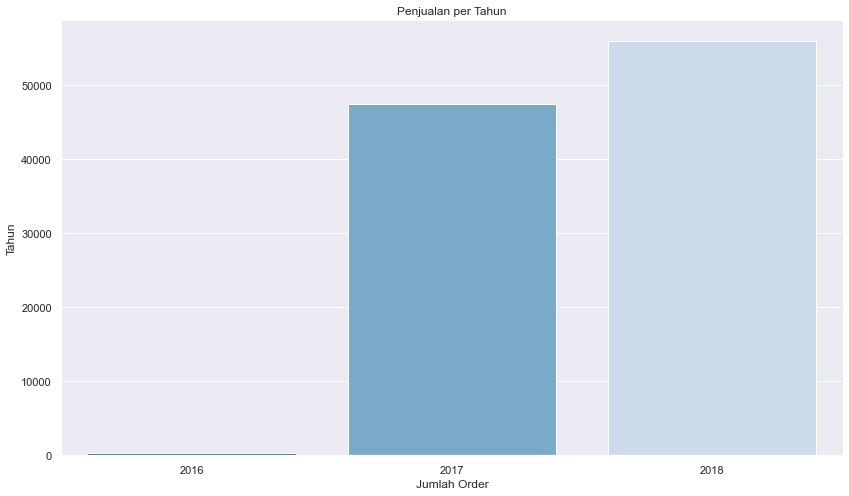

In [46]:
year_order = sns.barplot(x = 'year_purchase', y = 'count', data = df7, palette = 'Blues_r')
year_order.set(xlabel ="Jumlah Order", ylabel = "Tahun", title ='Penjualan per Tahun')

## Jumlah Order per Jam Berdasarkan Tipe Hari

In [18]:
df

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,hour_purchase,day_purchase,month_purchase,year_purchase,dayofweek_purchase,weekofyear_purchase,index_y,payment_sequential,payment_type,payment_installments,payment_value,day_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,10770.0,1.0,credit_card,1.0,18.12,weekdays
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,44246.0,3.0,voucher,1.0,2.00,weekdays
2,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,91130.0,2.0,voucher,1.0,18.59,weekdays
3,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,20,24,7,2018,1,30,7652.0,1.0,boleto,1.0,141.46,weekdays
4,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,8,8,8,2018,2,32,11176.0,1.0,credit_card,3.0,179.12,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103739,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,9,9,3,2017,3,10,50534.0,1.0,credit_card,3.0,85.08,weekdays
103740,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,12,6,2,2018,1,6,48750.0,1.0,credit_card,3.0,195.00,weekdays
103741,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,14,27,8,2017,6,34,96280.0,1.0,credit_card,5.0,271.01,weekend
103742,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,21,8,1,2018,0,2,NaN,NaN,NaN,NaN,NaN,weekdays


In [19]:
df3= df.groupby(['hour_purchase', 'day_status'])['order_id'].count().reset_index(name = 'count').sort_values(by = ['count'], ascending = False)

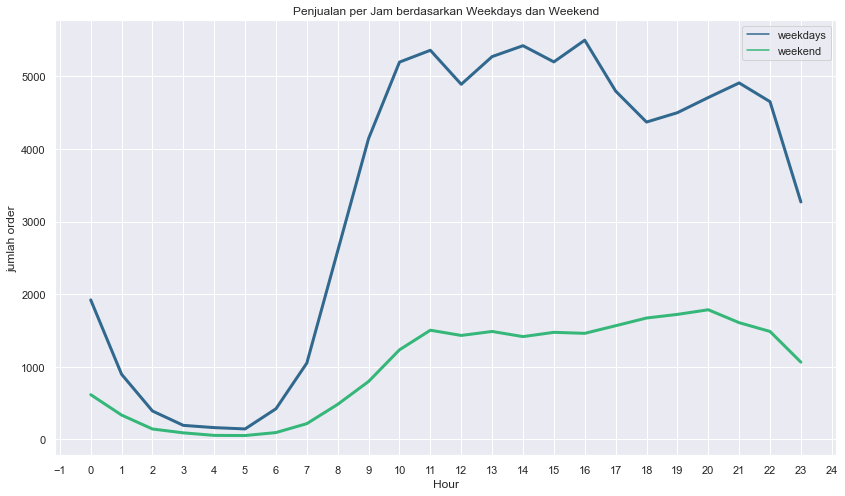

In [50]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df3, x ='hour_purchase', y = 'count',
                    hue = 'day_status', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('jumlah order')
plt.xlabel('Hour')
plt.title('Penjualan per Jam berdasarkan Weekdays dan Weekend')
plt.show()

## Total Pembayaran Berdasarkan Tipe Pembayaran

In [62]:
df5= df.groupby(['payment_type'])['order_id'].count().reset_index(name = 'Total_Transaction').sort_values(by = ['Total_Transaction'], ascending = False)
df5

,payment_type,Total_Transaction
1,credit_card,70269
0,boleto,18504
4,voucher,5685
2,debit_card,1444
3,not_defined,3


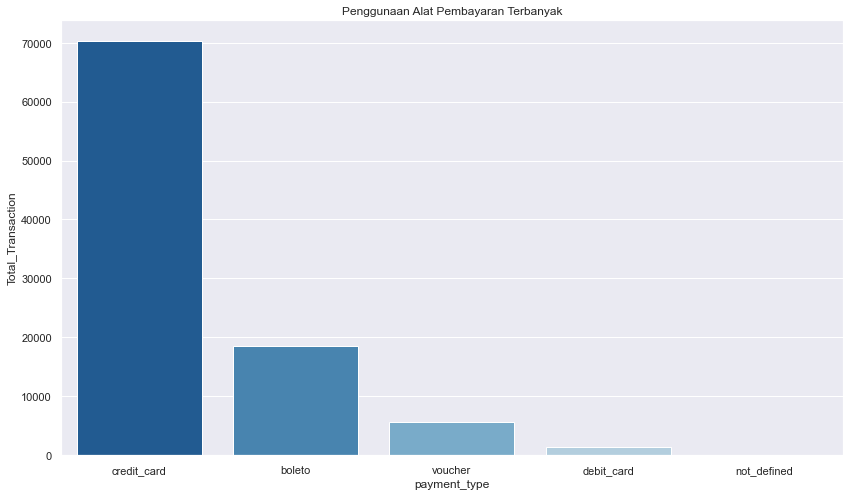

In [63]:
sns.barplot(x = 'payment_type', y = 'Total_Transaction', data = df5, palette = 'Blues_r')
plt.title('Penggunaan Alat Pembayaran Terbanyak')
plt.show()

## Product dengan penjualan tertinggi

In [23]:
proprice = olist_order_dataset.merge(olist_order_item_dataset, on = 'order_id', how = 'left')
proprice.head()

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,hour_purchase,day_purchase,month_purchase,year_purchase,dayofweek_purchase,weekofyear_purchase,index_y,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,100785.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,20,24,7,2018,1,30,36896.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,8,8,8,2018,2,32,31504.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,19,18,11,2017,5,46,65021.0,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,21,13,2,2018,1,7,76043.0,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [24]:
priice = proprice.groupby('order_id').agg({'price':'sum', 'order_item_id': 'count'}).reset_index().rename(columns={'order_item_id':'num_items'}).sort_values(by='num_items', ascending = False)
priice

,order_id,price,num_items
50543,8272b63d03f5f79c56e9e4120aec44ef,31.80,21
10541,1b15974a0141d54e36626dca3fdc731a,2000.00,20
66248,ab14fdcfbe524636d65ee38360e22ce8,1974.00,20
61436,9ef13efd6949e4573a18964dd1bbe7f5,765.00,15
25797,428a2f660dc84138d969ccd69a0ab6d5,982.35,15
...,...,...,...
89940,e744792a1abc89d92d36e086697eaf97,0.00,0
91994,ecae73914f65a01db35cc609281364ef,0.00,0
60054,9b932dca249f9971b86dde2f2d7ad412,0.00,0
41232,6a30e349ceba14fcd64f13c3fd62aed3,0.00,0


## Kategori Barang dengan Penjualan Tertinggi

In [25]:
merge_product = proprice.merge(olist_order_products_dataset, on = 'product_id', how = 'left')
merge_product

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,hour_purchase,day_purchase,month_purchase,year_purchase,dayofweek_purchase,weekofyear_purchase,index_y,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index,product_category_name
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,100785.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2349.0,utilidades_domesticas
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,20,24,7,2018,1,30,36896.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,20550.0,perfumaria
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,8,8,8,2018,2,32,31504.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,12228.0,automotivo
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,19,18,11,2017,5,46,65021.0,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,29925.0,pet_shop
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,21,13,2,2018,1,7,76043.0,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,11900.0,papelaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,12,6,2,2018,1,6,43826.0,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,1778.0,bebes
113421,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,14,27,8,2017,6,34,57884.0,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,14953.0,eletrodomesticos_2
113422,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,21,8,1,2018,0,2,7844.0,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,8290.0,informatica_acessorios
113423,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,21,8,1,2018,0,2,7845.0,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,8290.0,informatica_acessorios


In [26]:
product_top_cat = merge_product.groupby('product_category_name').agg({'price':'sum', 'order_item_id': 'count'}).reset_index().rename(columns={'order_item_id':'num_items'}).sort_values(by='num_items', ascending = False)
product_top_cat

,product_category_name,price,num_items
13,cama_mesa_banho,1036988.68,11115
11,beleza_saude,1258681.34,9670
32,esporte_lazer,988048.97,8641
54,moveis_decoracao,729762.49,8334
44,informatica_acessorios,911954.32,7827
...,...,...,...
17,cds_dvds_musicais,730.00,14
46,la_cuisine,2054.99,14
60,pc_gamer,1545.95,9
37,fashion_roupa_infanto_juvenil,569.85,8


<AxesSubplot:xlabel='product_category_name', ylabel='num_items'>

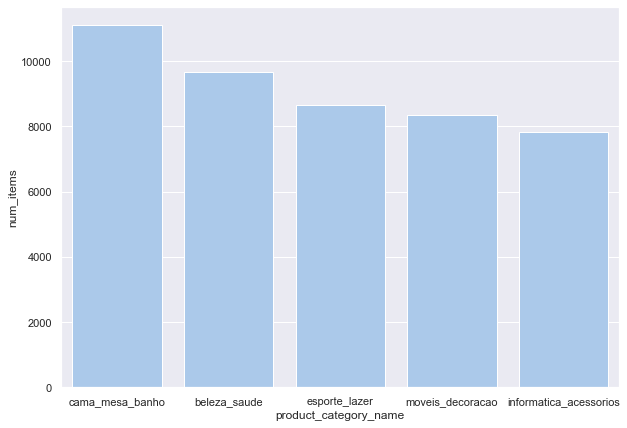

In [42]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="product_category_name", y="num_items", data=product_top_cat.head(),
            label="Total", color="b")

In [27]:
product_top_cat['Value_item_sold'] = product_top_cat['price'] * product_top_cat['num_items']
product_top_cat.sort_values(by = 'Value_item_sold', ascending = False)

,product_category_name,price,num_items,Value_item_sold
11,beleza_saude,1258681.34,9670,1.217145e+10
13,cama_mesa_banho,1036988.68,11115,1.152613e+10
32,esporte_lazer,988048.97,8641,8.537731e+09
66,relogios_presentes,1205005.68,5991,7.219189e+09
44,informatica_acessorios,911954.32,7827,7.137866e+09
...,...,...,...,...
15,casa_conforto_2,760.27,30,2.280810e+04
60,pc_gamer,1545.95,9,1.391355e+04
17,cds_dvds_musicais,730.00,14,1.022000e+04
37,fashion_roupa_infanto_juvenil,569.85,8,4.558800e+03


In [28]:
df.head()

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,hour_purchase,day_purchase,month_purchase,year_purchase,dayofweek_purchase,weekofyear_purchase,index_y,payment_sequential,payment_type,payment_installments,payment_value,day_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,10770.0,1.0,credit_card,1.0,18.12,weekdays
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,44246.0,3.0,voucher,1.0,2.00,weekdays
2,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10,2,10,2017,0,40,91130.0,2.0,voucher,1.0,18.59,weekdays
3,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,20,24,7,2018,1,30,7652.0,1.0,boleto,1.0,141.46,weekdays
4,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,8,8,8,2018,2,32,11176.0,1.0,credit_card,3.0,179.12,weekdays


## Heatmap Jumlah Order per Hari

In [29]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103744 entries, 0 to 103743
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   index_x                   103744 non-null  int64         
 1   order_id                  103744 non-null  object        
 2   customer_id               103744 non-null  object        
 3   order_status              103744 non-null  object        
 4   order_purchase_timestamp  103744 non-null  datetime64[ns]
 5   hour_purchase             103744 non-null  int64         
 6   day_purchase              103744 non-null  int64         
 7   month_purchase            103744 non-null  int64         
 8   year_purchase             103744 non-null  int64         
 9   dayofweek_purchase        103744 non-null  int64         
 10  weekofyear_purchase       103744 non-null  int64         
 11  index_y                   95905 non-null   float64       
 12  pa

In [30]:
df['day_name'] = df['order_purchase_timestamp'].dt.day_name()

In [31]:
hari_jam_df = df.groupby(['hour_purchase', 'day_name']).agg({'order_id':'count'}).rename(columns ={'order_id':'Jumlah'}).reset_index()
hari_jam_df

,hour_purchase,day_name,Jumlah
0,0,Friday,454
1,0,Monday,337
2,0,Saturday,335
3,0,Sunday,280
4,0,Thursday,383
...,...,...,...
163,23,Saturday,443
164,23,Sunday,620
165,23,Thursday,601
166,23,Tuesday,730


In [32]:
hari_jam_df['day_name']=pd.Categorical(hari_jam_df['day_name'],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)
hari_jam_df

,hour_purchase,day_name,Jumlah
0,0,Friday,454
1,0,Monday,337
2,0,Saturday,335
3,0,Sunday,280
4,0,Thursday,383
...,...,...,...
163,23,Saturday,443
164,23,Sunday,620
165,23,Thursday,601
166,23,Tuesday,730


In [33]:
day_hour_df= hari_jam_df.pivot('day_name','hour_purchase','Jumlah')

In [34]:
day_hour_df

hour_purchase,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Monday,337,140,68,37,22,27,69,163,494,798,...,1147,1110,1126,1034,986,986,1071,1162,1049,761
Tuesday,321,163,83,28,29,24,71,235,539,911,...,1180,1088,1123,986,907,953,1052,1096,1026,730
Wednesday,426,198,86,33,37,28,97,213,535,857,...,1089,1014,1085,1003,892,881,953,1006,929,635
Thursday,383,174,76,42,33,28,86,230,518,788,...,1009,968,1135,938,823,864,866,877,919,601
Friday,454,221,77,52,40,36,98,210,511,791,...,998,1020,1030,837,763,816,767,769,729,543
Saturday,335,190,72,45,26,25,54,108,260,445,...,713,745,733,740,747,777,765,670,571,443
Sunday,280,144,70,44,28,27,39,108,222,352,...,702,729,727,825,924,944,1020,937,915,620


In [35]:
fig6 = px.imshow(day_hour_df,
                labels=dict(x="Jam", y="Hari"), color_continuous_scale='blugrn', template="plotly_white",)
fig6.update_xaxes(side="top")
fig6.show()

## Melihat Review di Olist

In [52]:
olist_order_reviews_dataset

,index,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,hour_review,day_review,month_review,year_review,dayofweek_review,weekofyear_review
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,21,18,1,2018,3,3
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,3,11,3,2018,6,10
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,14,18,2,2018,6,7
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06,22,21,4,2017,4,16
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53,10,2,3,2018,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...
99219,99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00,2018-07-14 17:18:30,17,14,7,2018,5,28
99220,99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42,20,11,12,2017,0,50
99221,99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43,9,23,3,2018,4,12
99222,99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00,2018-07-02 12:59:13,12,2,7,2018,0,27


In [57]:
# merge pada data order dan payments
df8 = pd.merge(olist_order_reviews_dataset, merge_product, on = 'order_id', how = 'left' )
df8

,index_x,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,hour_review,day_review,month_review,year_review,...,weekofyear_purchase,index_y,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,product_category_name
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,21,18,1,2018,...,2,51033.0,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,24450.0,esporte_lazer
1,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,21,18,1,2018,...,2,51034.0,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,24450.0,esporte_lazer
2,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,3,11,3,2018,...,9,72472.0,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30,20298.0,informatica_acessorios
3,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,14,18,2,2018,...,5,109962.0,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12,8290.0,informatica_acessorios
4,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06,22,21,4,2017,...,14,44664.0,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85,24790.0,ferramentas_jardim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113126,99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00,2018-07-14 17:18:30,17,14,7,2018,...,26,18516.0,1.0,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,2018-07-02 17:30:37,226.77,61.20,28256.0,moveis_decoracao
113127,99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42,20,11,12,2017,...,48,15306.0,1.0,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77,3388.0,brinquedos
113128,99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43,9,23,3,2018,...,11,37835.0,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59,27899.0,papelaria
113129,99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00,2018-07-02 12:59:13,12,2,7,2018,...,25,52329.0,1.0,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,2018-06-26 18:15:29,50.95,15.46,22446.0,esporte_lazer


In [60]:
df10 = df8.groupby(['review_score']).agg({'order_id':'count'}).rename(columns ={'order_id':'Jumlah'}).reset_index()
df10

,review_score,Jumlah
0,1,14775
1,2,3936
2,3,9476
3,4,21348
4,5,63596


<AxesSubplot:xlabel='review_score', ylabel='Jumlah'>

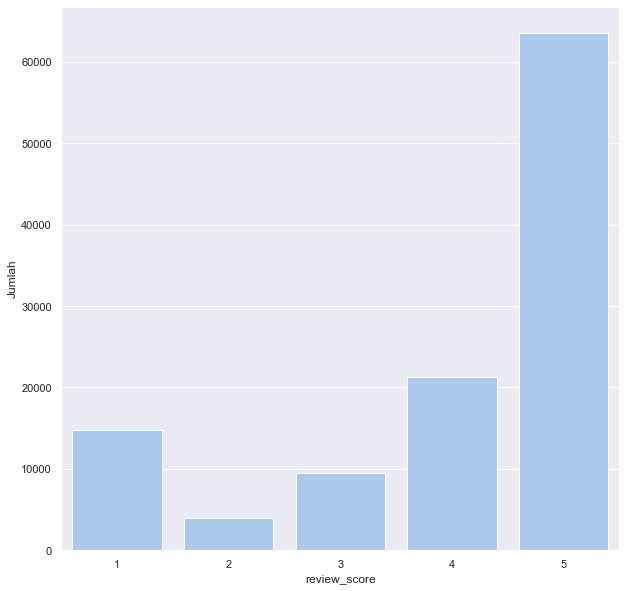

In [66]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="review_score", y="Jumlah", data=df10,
            label="Total", color="b")